In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro
from pprint import pprint

1.

In [4]:
df = pd.read_csv("bank_loan.csv")

In [5]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
0,2072-08-01,22,63052,631,Employed,Master,2,18271,12,Married,...,5254.333333,0.639338,3.0,1409,0.167771,0.156702,1654.893043,0.397366,51.0,0
1,2068-04-14,42,62117,522,Employed,Associate,20,29281,108,Divorced,...,5176.416667,0.835783,5.0,106328,0.313281,0.294022,774.117592,0.190888,50.0,0
2,2062-04-07,31,32448,544,Employed,Bachelor,5,33395,60,Divorced,...,2704.000000,0.879069,3.0,8626,0.266395,0.286945,1053.817922,0.531368,54.0,0
3,2031-05-29,19,32182,478,Unemployed,Master,0,49105,24,Single,...,2681.833333,0.868833,7.0,96744,0.285105,0.247245,2614.025710,1.125732,53.0,0
4,2024-04-04,45,77191,646,Employed,Master,21,99655,24,Married,...,6432.583333,0.982722,8.0,16312,0.251655,0.256010,5348.835792,0.924642,52.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             2050 non-null   object 
 1   Age                         2050 non-null   int64  
 2   AnnualIncome                2050 non-null   int64  
 3   CreditScore                 2050 non-null   int64  
 4   EmploymentStatus            1976 non-null   object 
 5   EducationLevel              2050 non-null   object 
 6   Experience                  2050 non-null   int64  
 7   LoanAmount                  2050 non-null   object 
 8   LoanDuration                2050 non-null   int64  
 9   MaritalStatus               2050 non-null   object 
 10  NumberOfDependents          1963 non-null   float64
 11  HomeOwnershipStatus         1951 non-null   object 
 12  MonthlyDebtPayments         2009 non-null   float64
 13  CreditCardUtilizationRate   2050 

In [7]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,1963.000000,2009.000000,2050.000000,2050.000000,2050.000000,...,2050.000000,2050.000000,1936.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,39.952195,1.558224e+05,572.662927,17.353659,54.058537,1.455425,457.295669,0.294761,2.848780,0.968780,...,4759.490569,0.791977,5.076963,7.737341e+04,0.240882,0.240792,931.094014,0.405455,50.774927,0.239024
std,11.702246,9.780950e+05,63.820500,11.614698,24.404283,1.367463,239.521001,0.162348,1.899773,0.969018,...,3156.760304,0.122874,2.229185,1.340863e+05,0.035993,0.042887,710.769016,0.334684,7.745501,0.426592
min,18.000000,1.500000e+04,384.000000,-4.000000,12.000000,0.000000,85.000000,0.004364,-4.000000,0.000000,...,625.000000,0.276100,0.000000,1.018000e+03,0.130338,0.113310,118.491581,0.034436,30.400000,0.000000
25%,32.000000,3.274900e+04,538.000000,9.000000,36.000000,0.000000,289.000000,0.169033,2.000000,0.000000,...,2586.062500,0.712901,3.000000,9.073750e+03,0.215449,0.210321,511.277136,0.180706,46.000000,0.000000
50%,40.000000,4.926900e+04,575.000000,17.000000,48.000000,1.000000,405.000000,0.278739,3.000000,1.000000,...,3869.750000,0.809762,5.000000,3.569450e+04,0.238110,0.237375,735.522113,0.305972,51.000000,0.000000
75%,48.000000,7.434200e+04,608.000000,25.000000,72.000000,2.000000,568.000000,0.401770,4.000000,2.000000,...,5931.875000,0.887293,6.000000,9.202675e+04,0.264231,0.268571,1118.015055,0.518579,56.000000,0.000000
max,80.000000,1.000000e+07,950.000000,60.000000,120.000000,5.000000,2375.000000,0.835776,10.000000,5.000000,...,21606.500000,0.996563,12.000000,1.645402e+06,0.384555,0.395984,7859.855080,4.143180,76.000000,1.000000


In [8]:
df.shape

(2050, 36)

2.

In [9]:
print(df.isnull().sum()[df.isnull().sum() > 0])

EmploymentStatus        74
NumberOfDependents      87
HomeOwnershipStatus     99
MonthlyDebtPayments     41
JobTenure              114
dtype: int64


In [10]:
df_missing_cols = df[df.columns[df.isnull().any()]]

In [11]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])

EmploymentStatus       3.609756
NumberOfDependents     4.243902
HomeOwnershipStatus    4.829268
MonthlyDebtPayments    2.000000
JobTenure              5.560976
dtype: float64


In [12]:
print(df["EmploymentStatus"].value_counts(dropna=False))
print("-" * 30)
print(df["HomeOwnershipStatus"].value_counts(dropna=False))

EmploymentStatus
Employed         1698
Self-Employed     152
Unemployed        126
NaN                74
Name: count, dtype: int64
------------------------------
HomeOwnershipStatus
Mortgage    779
Rent        602
Own         368
Other       202
NaN          99
Name: count, dtype: int64


In [13]:
print(df["NumberOfDependents"].value_counts(dropna=False).sort_index())
print("-" * 30)
print(df["MonthlyDebtPayments"].describe())
print("-" * 30)
print(df["JobTenure"].describe())

NumberOfDependents
0.0    642
1.0    462
2.0    402
3.0    289
4.0    116
5.0     52
NaN     87
Name: count, dtype: int64
------------------------------
count    2009.000000
mean      457.295669
std       239.521001
min        85.000000
25%       289.000000
50%       405.000000
75%       568.000000
max      2375.000000
Name: MonthlyDebtPayments, dtype: float64
------------------------------
count    1936.000000
mean        5.076963
std         2.229185
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        12.000000
Name: JobTenure, dtype: float64


In [14]:
# به نظرم حتی میشه برای نامشخص یه دسته عددی تعریف کرد یا حتی با مد پرش کرد
df["HomeOwnershipStatus"] = df["HomeOwnershipStatus"].fillna("Unknown")

df["EmploymentStatus"] = df["EmploymentStatus"].fillna(
    df["EmploymentStatus"].mode()[0]
)

# با میانه پر کردم گفتم میانگین  احتمال تحت تاثیر داده های بزرگ و کوچک و پرته
numeric_cols = ["NumberOfDependents", "MonthlyDebtPayments", "JobTenure"]
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [15]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


3.

In [16]:
# خب به نظرم قبل اینکه در رابطه با داده های پرت تصمیم بگیرم بیام و تحلیل تک متغیره انجام بدم ، اینجوری بهتر میشه تصمیم گرفت
# میخوام یه تابع بنویسم اسم ستون رو بهش بدم اطلاعات آماری اون ستون رو برام برگردونه و متناسب با نوع داده تصمیم بگیره

In [26]:
def univariate_analysis_godmode(series, plot=True):
    col_name = series.name

    if pd.api.types.is_numeric_dtype(series):
        median_val = series.median()
        mode_val = series.mode()[0] if not series.mode().empty else np.nan
        mean_val = series.mean()
        std_val = series.std()
        min_val = series.min()
        max_val = series.max()
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        outliers = series[(series < q1 - 1.5 * iqr) | (series > q3 + 1.5 * iqr)]
        skew_val = skew(series)
        kurt_val = kurtosis(series)

        try:
            stat, p_value = shapiro(series)
            normality = "Normal" if p_value > 0.05 else "Not Normal"
        except:
            normality = "Test Failed"

        if normality == "Normal":
            distribution_type = "Normal"
        else:
            if skew_val > 0.5:
                distribution_type = "Right-skewed"
            elif skew_val < -0.5:
                distribution_type = "Left-skewed"
            else:
                distribution_type = "Approximately Symmetric"

        report = {
            "count": len(series),
            "mean": mean_val,
            "median": median_val,
            "mode": mode_val,
            "std": std_val,
            "min": min_val,
            "25%": q1,
            "75%": q3,
            "max": max_val,
            "skew": skew_val,
            "kurtosis": kurt_val,
            "outlier_count": len(outliers),
            "normality": normality,
            "distribution_type": distribution_type
        }

        print(f"\n=== {col_name} Analysis ===")
        df_report = pd.DataFrame(report, index=[0]).T.rename(columns={0: 'Value'})
        print(df_report)

        if plot:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(series, kde=True)
            plt.title(f"{col_name} - Histogram")
            plt.subplot(1, 2, 2)
            sns.boxplot(x=series)
            plt.title(f"{col_name} - Boxplot")
            plt.show()

    else:
        value_counts = series.value_counts()
        percentages = (value_counts / len(series) * 100).round(2)
        report = pd.DataFrame({
            "count": value_counts,
            "percentage": percentages
        })

        print(f"\n=== {col_name} Analysis ===")
        print(report)

        if plot:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.countplot(x=series, order=value_counts.index)
            plt.title(f"{col_name} - Countplot")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    return report


=== MonthlyDebtPayments Analysis ===
                          Value
count                      2050
mean                 456.249756
median                    405.0
mode                      405.0
std                  237.225574
min                        85.0
25%                       291.0
75%                       564.0
max                      2375.0
skew                   1.622621
kurtosis               4.761031
outlier_count                80
normality            Not Normal
distribution_type  Right-skewed


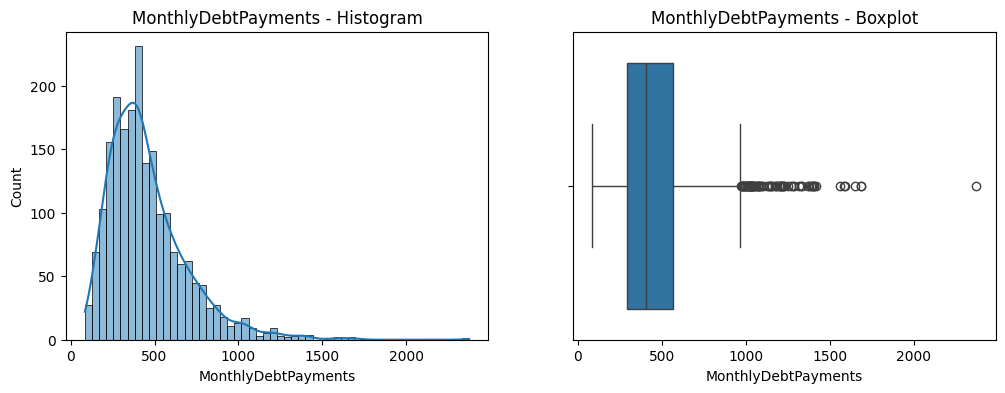

In [27]:
res_num = univariate_analysis_godmode(df["MonthlyDebtPayments"])


=== EmploymentStatus Analysis ===
                  count  percentage
EmploymentStatus                   
Employed           1772       86.44
Self-Employed       152        7.41
Unemployed          126        6.15


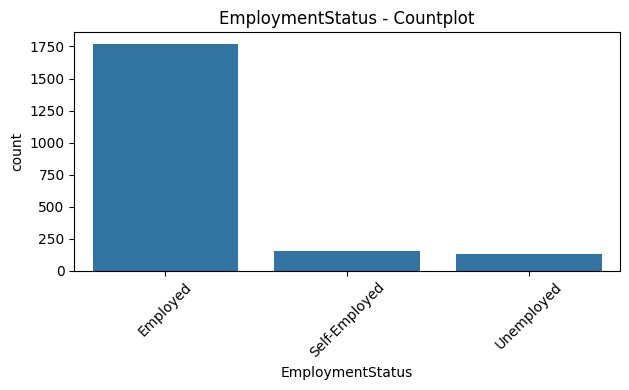

In [28]:
res_cat = univariate_analysis_godmode(df["EmploymentStatus"])

In [29]:
# یه ایده دارم بگیره ....

In [46]:
def dataframe_godmode_advanced(df, plot=True, numeric_only=False, categorical_only=False,
                               discrete_threshold=0.05, exclude_columns=None, max_discrete_unique=20):
    if exclude_columns is None:
        exclude_columns = []

    results = {}
    for col in df.columns:
        if col in exclude_columns:
            continue
        series = df[col]

        if numeric_only and not pd.api.types.is_numeric_dtype(series):
            continue
        if categorical_only and pd.api.types.is_numeric_dtype(series):
            continue

        col_name = series.name

        if pd.api.types.is_numeric_dtype(series):
            n_unique_ratio = series.nunique() / len(series)
            is_discrete = (n_unique_ratio < discrete_threshold) and (series.nunique() <= max_discrete_unique)

            median_val = series.median()
            mode_val = series.mode()[0] if not series.mode().empty else np.nan
            mean_val = series.mean()
            std_val = series.std()
            min_val = series.min()
            max_val = series.max()
            q1 = series.quantile(0.25)
            q3 = series.quantile(0.75)
            iqr = q3 - q1
            outliers = series[(series < q1 - 1.5*iqr) | (series > q3 + 1.5*iqr)]
            skew_val = skew(series)
            kurt_val = kurtosis(series)

            try:
                stat, p_value = shapiro(series)
                normality = "Normal" if p_value > 0.05 else "Not Normal"
            except:
                normality = "Test Failed"

            if normality == "Normal":
                distribution_type = "Normal"
            else:
                if skew_val > 0.5:
                    distribution_type = "Right-skewed"
                elif skew_val < -0.5:
                    distribution_type = "Left-skewed"
                else:
                    distribution_type = "Approximately Symmetric"

            report = {
                "count": len(series),
                "mean": mean_val,
                "median": median_val,
                "mode": mode_val,
                "std": std_val,
                "min": min_val,
                "25%": q1,
                "75%": q3,
                "max": max_val,
                "skew": skew_val,
                "kurtosis": kurt_val,
                "outlier_count": len(outliers),
                "normality": normality,
                "distribution_type": distribution_type,
                "discrete": is_discrete
            }

            print(f"\n=== {col_name} Analysis (Numeric {'Discrete' if is_discrete else 'Continuous'}) ===")
            df_report = pd.DataFrame(report, index=[0]).T.rename(columns={0:'Value'})
            print(df_report)

            if plot:
                plt.figure(figsize=(12, 4))
                if is_discrete:
                    sns.countplot(x=series, order=series.value_counts().index)
                    plt.title(f"{col_name} - Discrete Countplot")
                else:
                    # انتخاب خودکار bin
                    n = len(series)
                    bin_width = 2 * iqr / (n ** (1/3))
                    bins_fd = int(np.ceil((series.max() - series.min()) / bin_width))
                    bins_sturges = int(np.ceil(np.log2(n) + 1))
                    bins_to_use = max(bins_fd, bins_sturges, 5)

                    plt.subplot(1, 2, 1)
                    sns.histplot(series, kde=True, bins=bins_to_use)
                    plt.title(f"{col_name} - Histogram")
                    plt.subplot(1, 2, 2)
                    sns.boxplot(x=series)
                    plt.title(f"{col_name} - Boxplot")
                plt.show()

        else:
            value_counts = series.value_counts()
            percentages = (value_counts / len(series) * 100).round(2)
            report = pd.DataFrame({"count": value_counts, "percentage": percentages})

            print(f"\n=== {col_name} Analysis (Categorical) ===")
            print(report)

            if plot:
                plt.figure(figsize=(12, 4))
                plt.subplot(1, 2, 1)
                sns.countplot(x=series, order=value_counts.index)
                plt.title(f"{col_name} - Countplot")
                plt.xticks(rotation=45)
                plt.subplot(1, 2, 2)
                plt.pie(percentages, labels=percentages.index, autopct="%1.1f%%", startangle=90)
                plt.title(f"{col_name} - Pie Chart")
                plt.tight_layout()
                plt.show()

        results[col_name] = report

    return results


=== Age Analysis (Numeric Continuous) ===
                                     Value
count                                 2050
mean                             39.952195
median                                40.0
mode                                    18
std                              11.702246
min                                     18
25%                                   32.0
75%                                   48.0
max                                     80
skew                              0.188908
kurtosis                         -0.299357
outlier_count                            8
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                             False


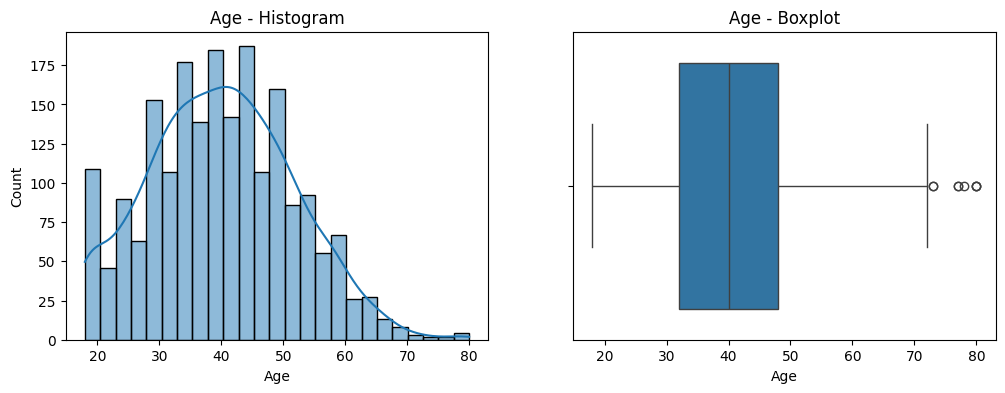


=== AnnualIncome Analysis (Numeric Continuous) ===
                           Value
count                       2050
mean               155822.386341
median                   49269.0
mode                       15000
std                978094.956476
min                        15000
25%                      32749.0
75%                      74342.0
max                     10000000
skew                    9.952491
kurtosis               97.206137
outlier_count                131
normality             Not Normal
distribution_type   Right-skewed
discrete                   False


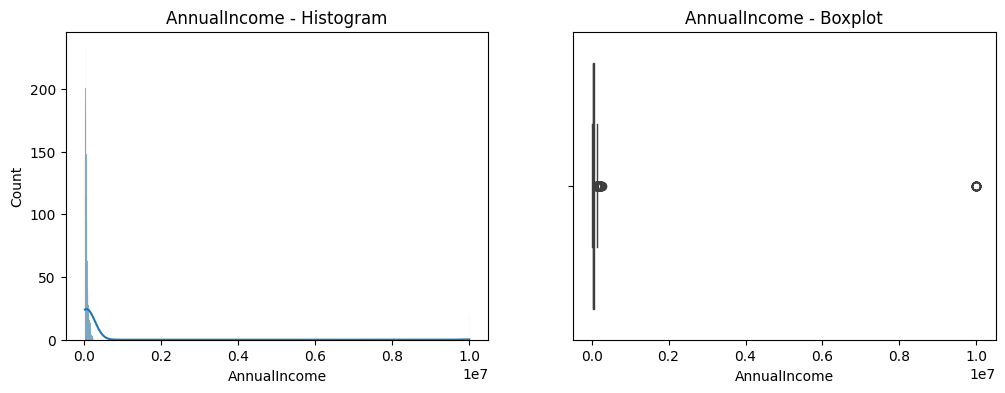


=== CreditScore Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean                 572.662927
median                    575.0
mode                        596
std                     63.8205
min                         384
25%                       538.0
75%                       608.0
max                         950
skew                   1.594342
kurtosis               10.38657
outlier_count                45
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


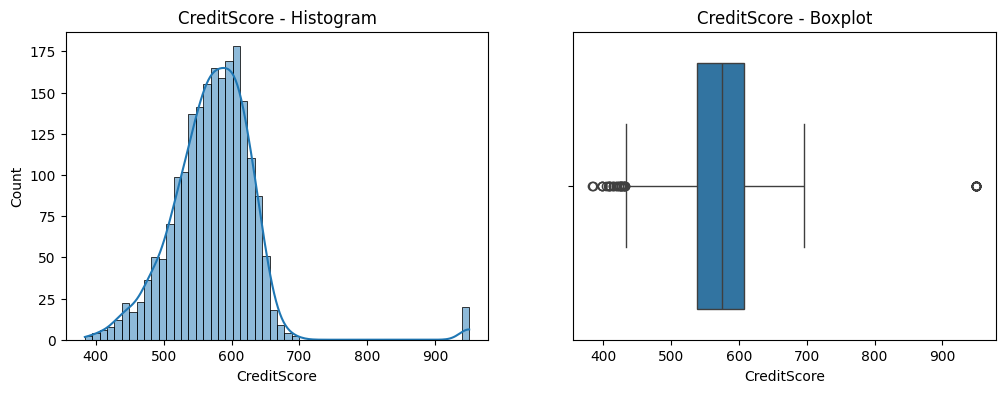


=== EmploymentStatus Analysis (Categorical) ===
                  count  percentage
EmploymentStatus                   
Employed           1772       86.44
Self-Employed       152        7.41
Unemployed          126        6.15


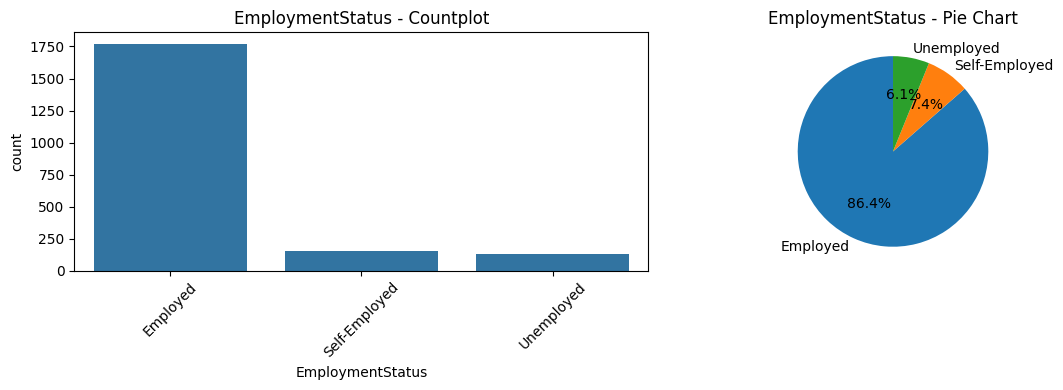


=== EducationLevel Analysis (Categorical) ===
                count  percentage
EducationLevel                   
Bachelor          657       32.05
High School       589       28.73
Associate         398       19.41
Master            326       15.90
Doctorate          80        3.90


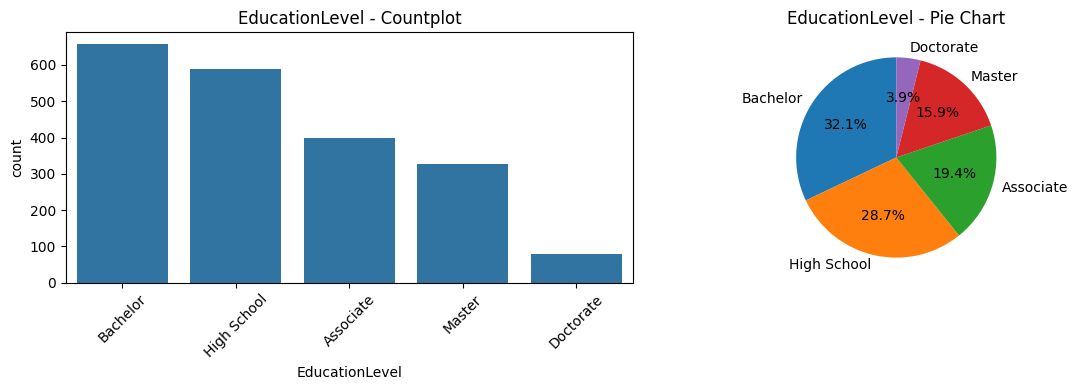


=== Experience Analysis (Numeric Continuous) ===
                                     Value
count                                 2050
mean                             17.353659
median                                17.0
mode                                     0
std                              11.614698
min                                     -4
25%                                    9.0
75%                                   25.0
max                                     60
skew                              0.312799
kurtosis                         -0.370848
outlier_count                            7
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                             False


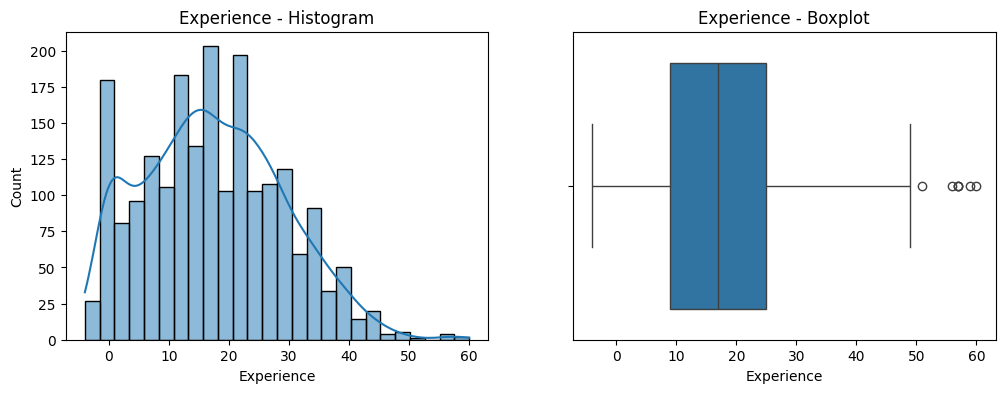


=== LoanAmount Analysis (Numeric Continuous) ===
                                     Value
count                                 2050
mean                          25365.401709
median                             22109.0
mode                                8583.0
std                           14344.358549
min                                 4188.0
25%                                16116.0
75%                                30810.0
max                               158686.0
skew                                   NaN
kurtosis                               NaN
outlier_count                           93
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                             False


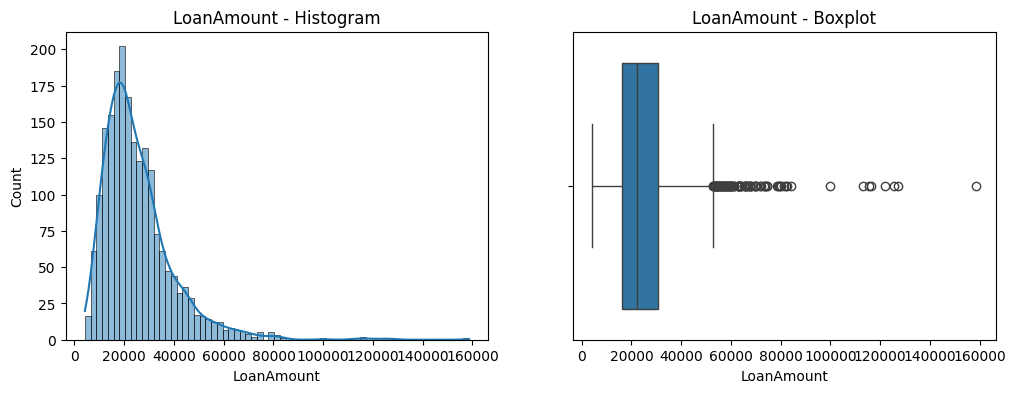


=== LoanDuration Analysis (Numeric Discrete) ===
                          Value
count                      2050
mean                  54.058537
median                     48.0
mode                         48
std                   24.404283
min                          12
25%                        36.0
75%                        72.0
max                         120
skew                   0.641866
kurtosis               0.143612
outlier_count                 0
normality            Not Normal
distribution_type  Right-skewed
discrete                   True


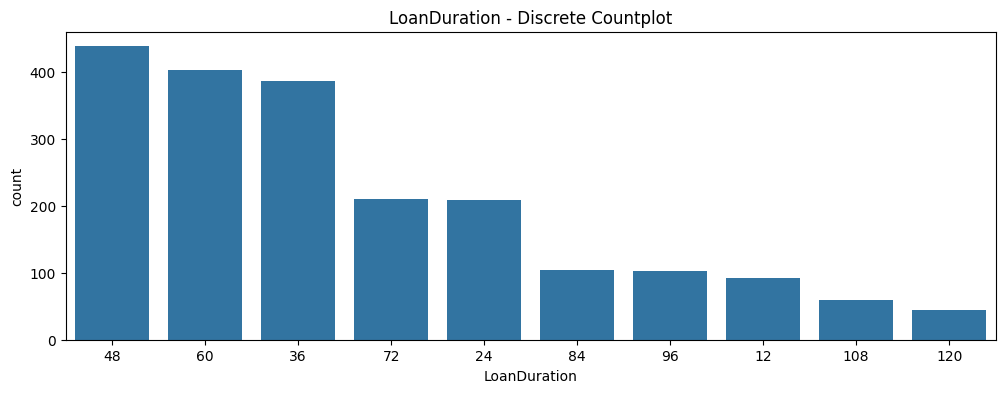


=== MaritalStatus Analysis (Categorical) ===
               count  percentage
MaritalStatus                   
Married         1040       50.73
Single           588       28.68
Divorced         307       14.98
Widowed          115        5.61


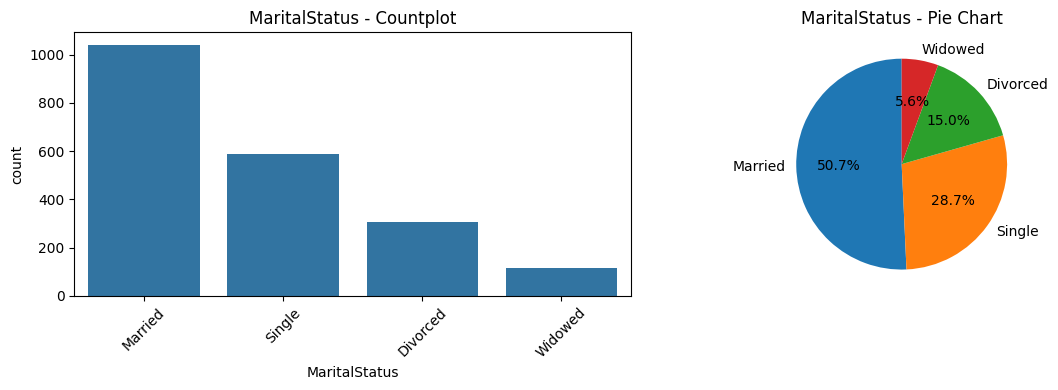


=== NumberOfDependents Analysis (Numeric Discrete) ===
                          Value
count                      2050
mean                   1.436098
median                      1.0
mode                        0.0
std                    1.341264
min                         0.0
25%                         0.0
75%                         2.0
max                         5.0
skew                   0.716071
kurtosis              -0.296122
outlier_count                 0
normality            Not Normal
distribution_type  Right-skewed
discrete                   True


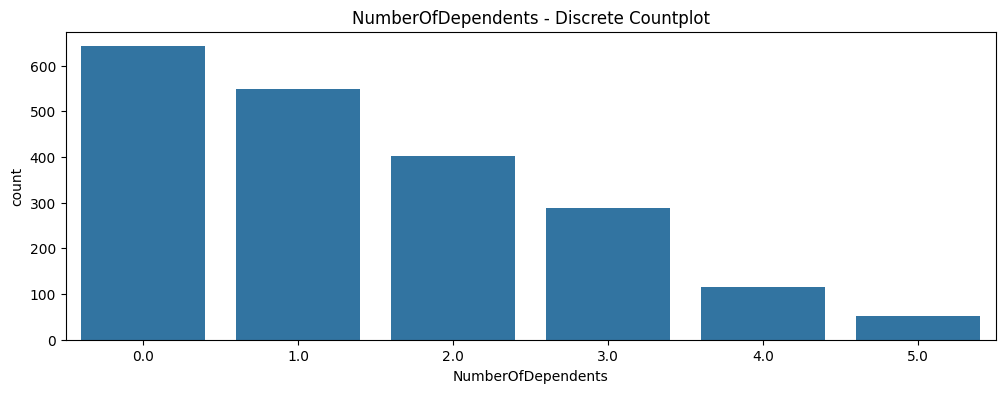


=== HomeOwnershipStatus Analysis (Categorical) ===
                     count  percentage
HomeOwnershipStatus                   
Mortgage               779       38.00
Rent                   602       29.37
Own                    368       17.95
Other                  202        9.85
Unknown                 99        4.83


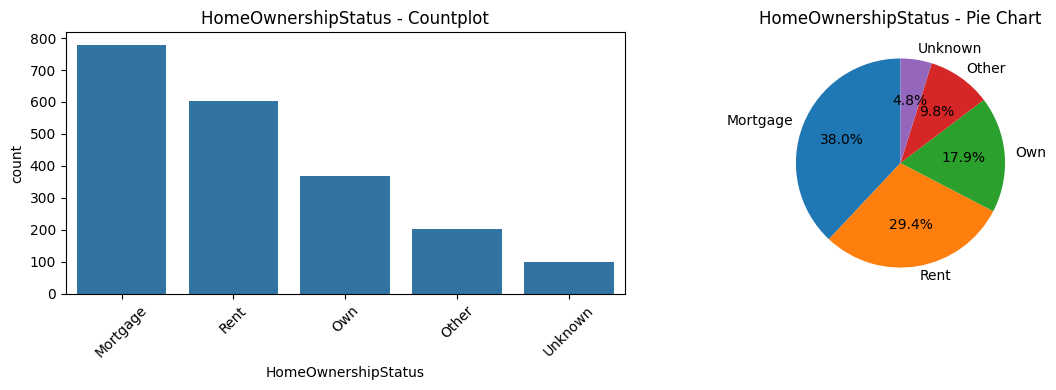


=== MonthlyDebtPayments Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean                 456.249756
median                    405.0
mode                      405.0
std                  237.225574
min                        85.0
25%                       291.0
75%                       564.0
max                      2375.0
skew                   1.622621
kurtosis               4.761031
outlier_count                80
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


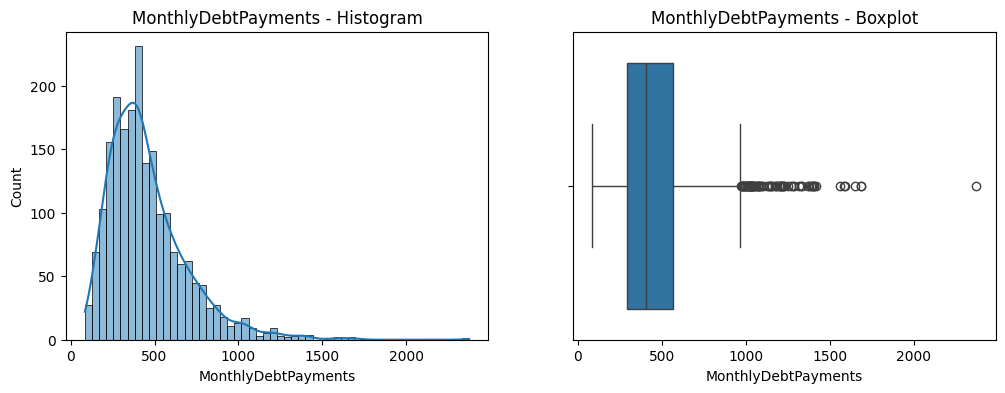


=== CreditCardUtilizationRate Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean                   0.294761
median                 0.278739
mode                   0.004364
std                    0.162348
min                    0.004364
25%                    0.169033
75%                     0.40177
max                    0.835776
skew                   0.542668
kurtosis              -0.191889
outlier_count                13
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


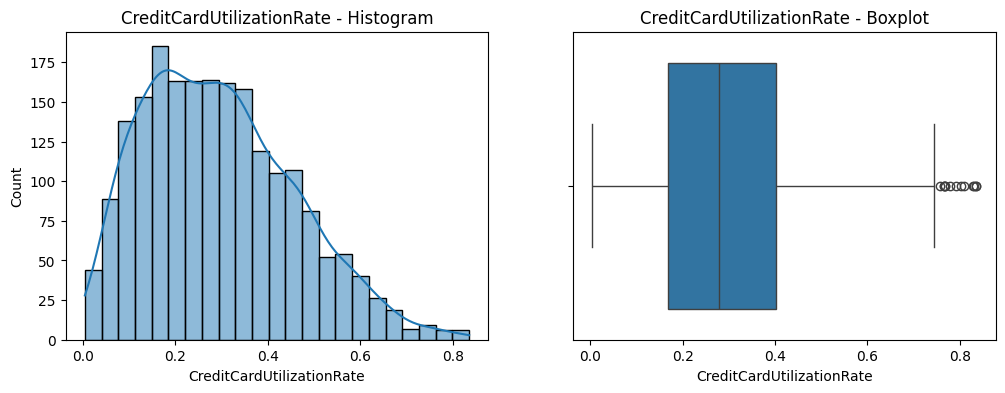


=== NumberOfOpenCreditLines Analysis (Numeric Discrete) ===
                                     Value
count                                 2050
mean                               2.84878
median                                 3.0
mode                                     3
std                               1.899773
min                                     -4
25%                                    2.0
75%                                    4.0
max                                     10
skew                              0.016087
kurtosis                          1.217528
outlier_count                           51
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                              True


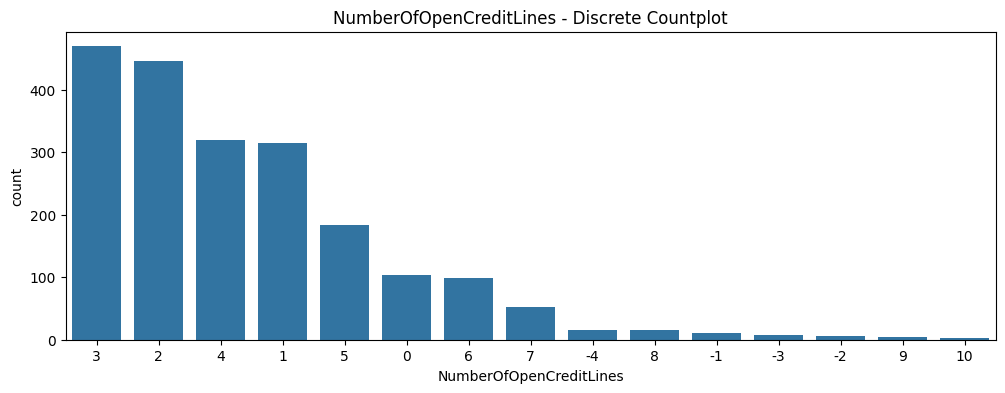


=== NumberOfCreditInquiries Analysis (Numeric Discrete) ===
                          Value
count                      2050
mean                    0.96878
median                      1.0
mode                          0
std                    0.969018
min                           0
25%                         0.0
75%                         2.0
max                           5
skew                   0.918626
kurtosis               0.571135
outlier_count                 0
normality            Not Normal
distribution_type  Right-skewed
discrete                   True


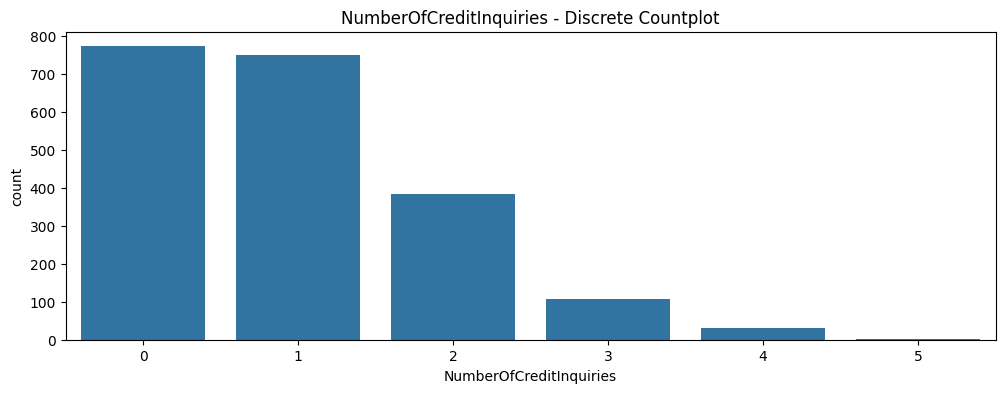


=== DebtToIncomeRatio Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean                   0.287147
median                 0.269018
mode                    0.00172
std                    0.156051
min                     0.00172
25%                    0.164017
75%                    0.388986
max                    0.816464
skew                   0.549088
kurtosis              -0.114691
outlier_count                17
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


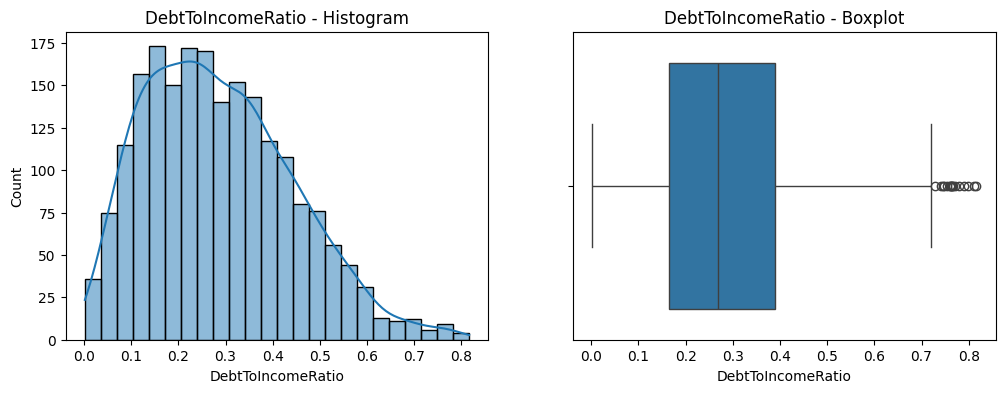


=== BankruptcyHistory Analysis (Numeric Discrete) ===
                          Value
count                      2050
mean                   0.052683
median                      0.0
mode                          0
std                    0.223454
min                           0
25%                         0.0
75%                         0.0
max                           1
skew                   4.004634
kurtosis              14.037094
outlier_count               108
normality            Not Normal
distribution_type  Right-skewed
discrete                   True


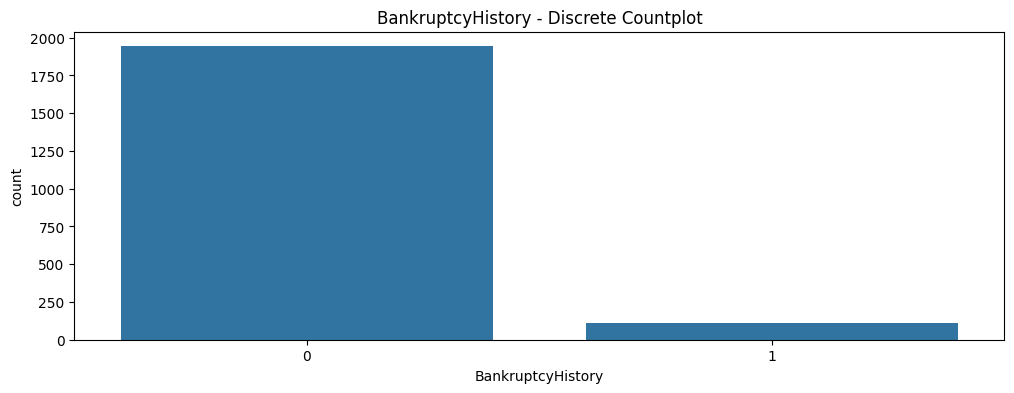


=== LoanPurpose Analysis (Categorical) ===
                    count  percentage
LoanPurpose                          
Home                  618       30.15
Debt Consolidation    515       25.12
Auto                  441       21.51
Education             272       13.27
Other                 204        9.95


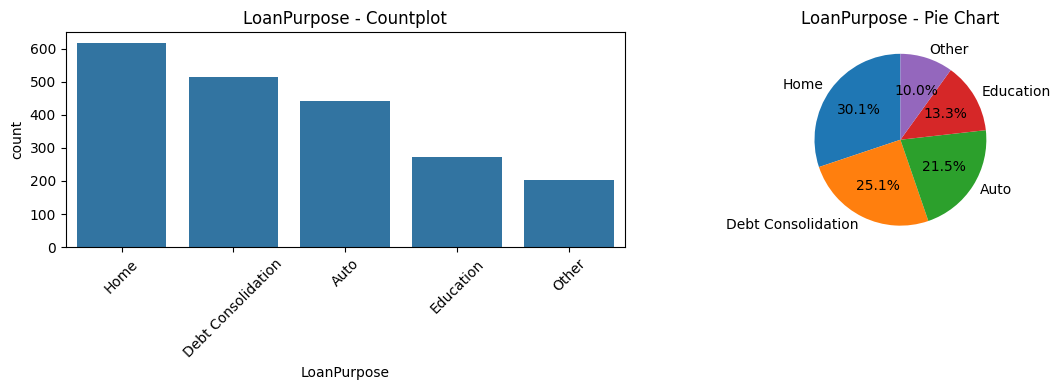


=== PreviousLoanDefaults Analysis (Numeric Discrete) ===
                          Value
count                      2050
mean                   0.099512
median                      0.0
mode                          0
std                    0.299422
min                           0
25%                         0.0
75%                         0.0
max                           1
skew                    2.67573
kurtosis               5.159529
outlier_count               204
normality            Not Normal
distribution_type  Right-skewed
discrete                   True


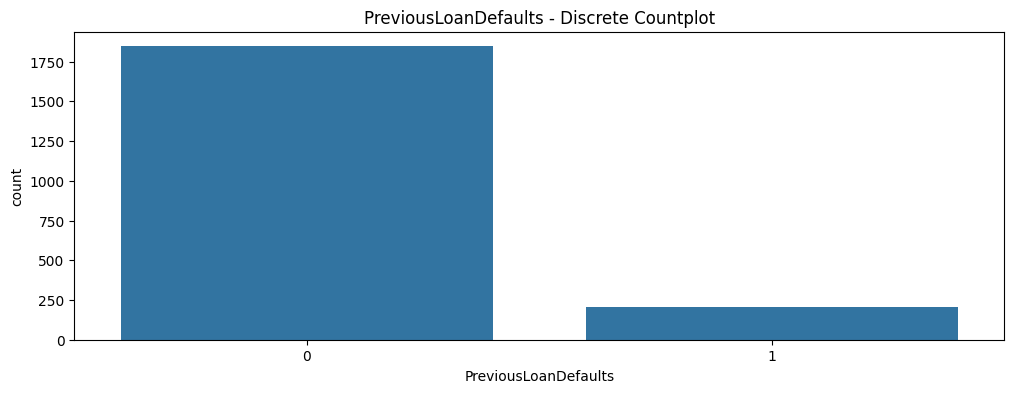


=== PaymentHistory Analysis (Numeric Continuous) ===
                                     Value
count                                 2050
mean                             24.163902
median                                24.0
mode                                    24
std                               4.777169
min                                      8
25%                                   21.0
75%                                   27.0
max                                     41
skew                              0.110107
kurtosis                         -0.094785
outlier_count                           22
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                             False


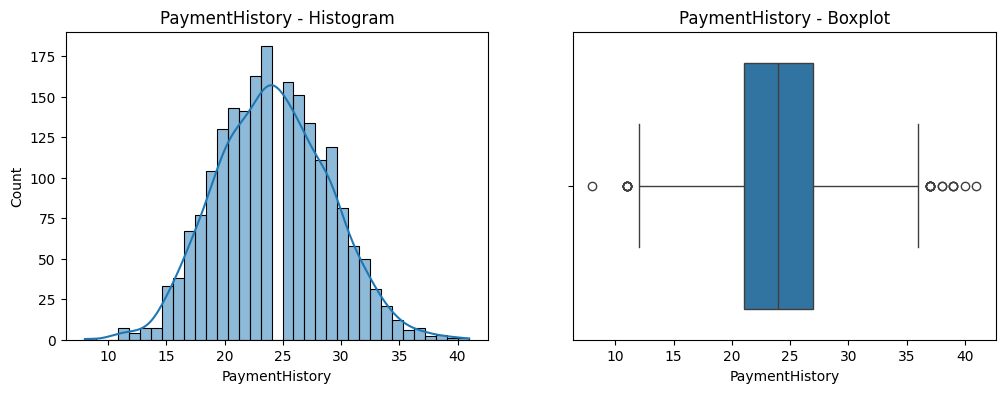


=== LengthOfCreditHistory Analysis (Numeric Continuous) ===
                                     Value
count                                 2050
mean                             14.942439
median                                15.0
mode                                    15
std                               8.289162
min                                      1
25%                                    8.0
75%                                   22.0
max                                     29
skew                              0.007119
kurtosis                         -1.185711
outlier_count                            0
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                             False


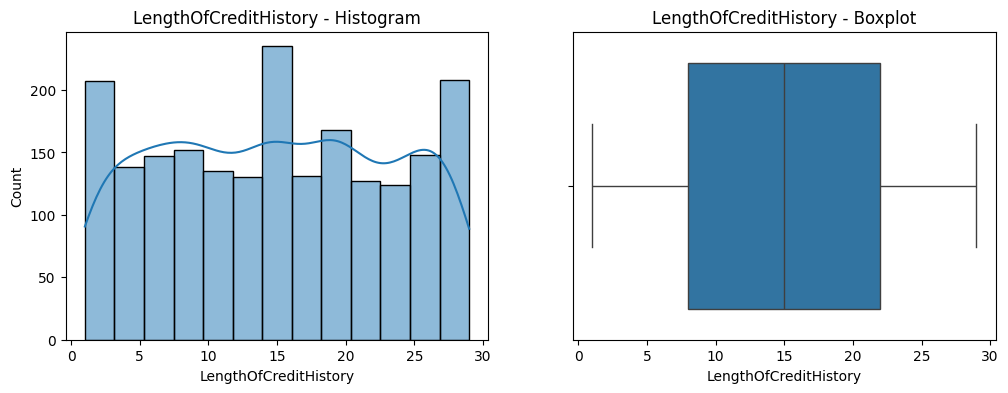


=== SavingsAccountBalance Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean                4645.260488
median                   2866.0
mode                       1303
std                 6229.288152
min                          73
25%                     1488.75
75%                     5485.75
max                      112659
skew                    6.48174
kurtosis              74.192692
outlier_count               164
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


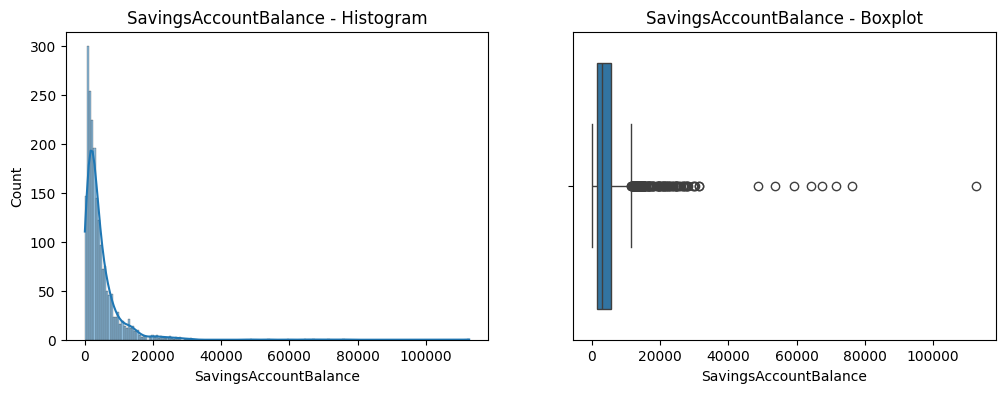


=== CheckingAccountBalance Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean                1795.571707
median                   1123.5
mode                        209
std                  2404.46265
min                          45
25%                      553.25
75%                     2130.75
max                       52572
skew                   7.204125
kurtosis             110.193544
outlier_count               158
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


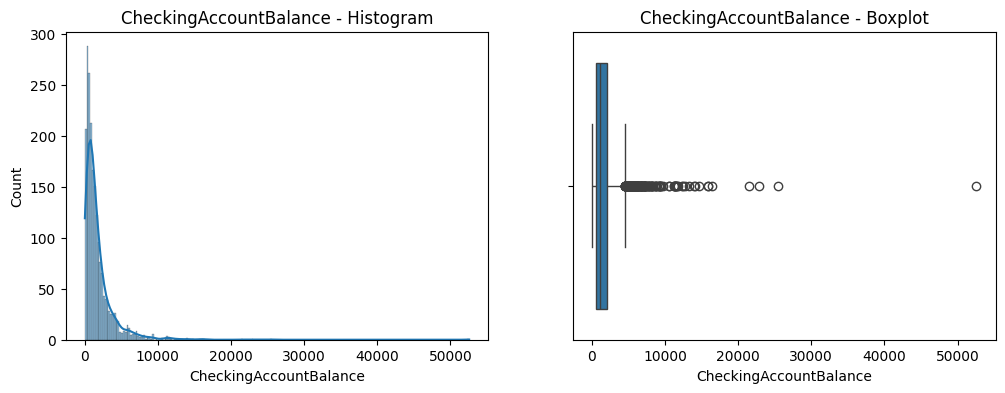


=== TotalAssets Analysis (Numeric Continuous) ===
                           Value
count                       2050
mean               102476.857073
median                   62315.5
mode                        7499
std                137058.807006
min                         2760
25%                     31850.25
75%                     121817.0
max                      1665558
skew                    5.145249
kurtosis                40.23781
outlier_count                142
normality             Not Normal
distribution_type   Right-skewed
discrete                   False


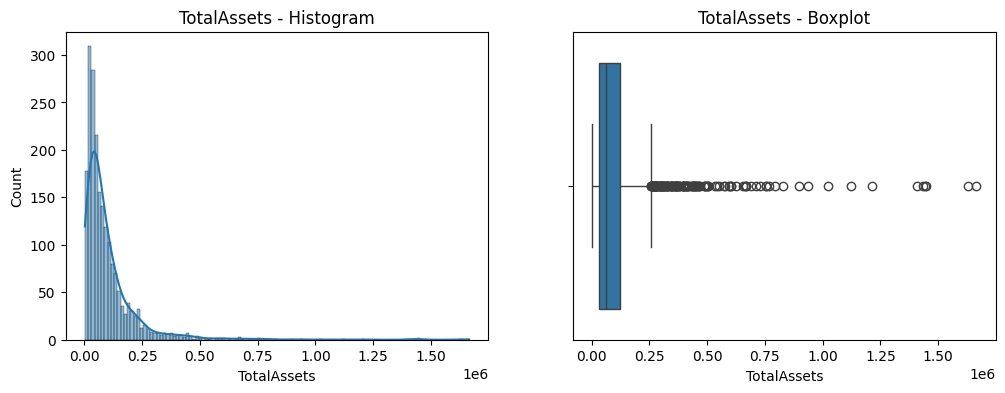


=== TotalLiabilities Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean               36951.705366
median                  22000.5
mode                       2867
std                51809.558363
min                        1076
25%                    11293.25
75%                    43934.75
max                      912238
skew                   6.320112
kurtosis              70.652502
outlier_count               150
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


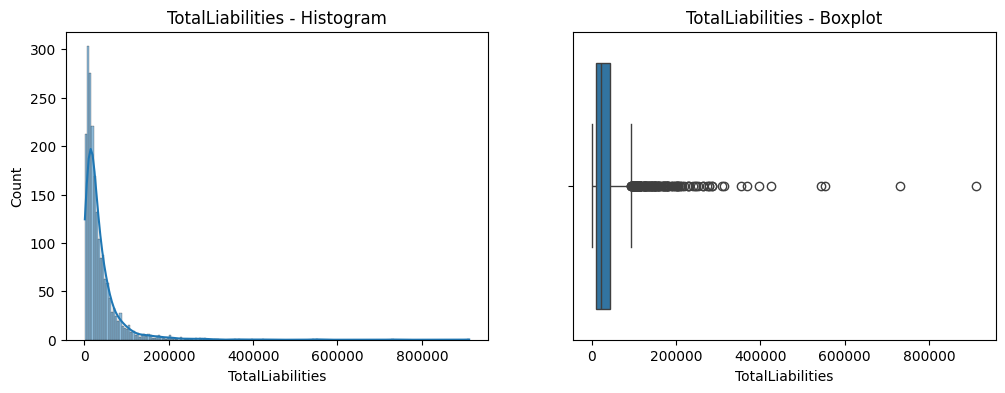


=== MonthlyIncome Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean                4759.490569
median                  3869.75
mode                     1250.0
std                 3156.760304
min                       625.0
25%                   2586.0625
75%                    5931.875
max                     21606.5
skew                   1.716679
kurtosis               3.666478
outlier_count               114
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


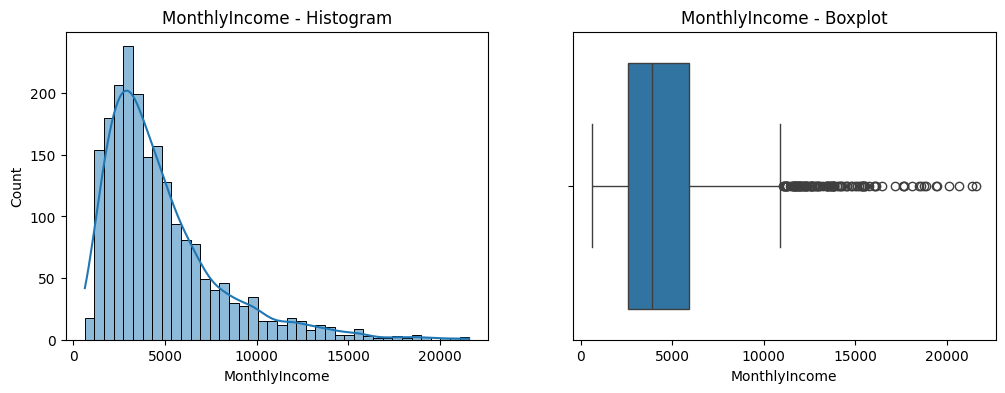


=== UtilityBillsPaymentHistory Analysis (Numeric Continuous) ===
                         Value
count                     2050
mean                  0.791977
median                0.809762
mode                    0.2761
std                   0.122874
min                     0.2761
25%                   0.712901
75%                   0.887293
max                   0.996563
skew                 -0.712062
kurtosis              0.199018
outlier_count               15
normality           Not Normal
distribution_type  Left-skewed
discrete                 False


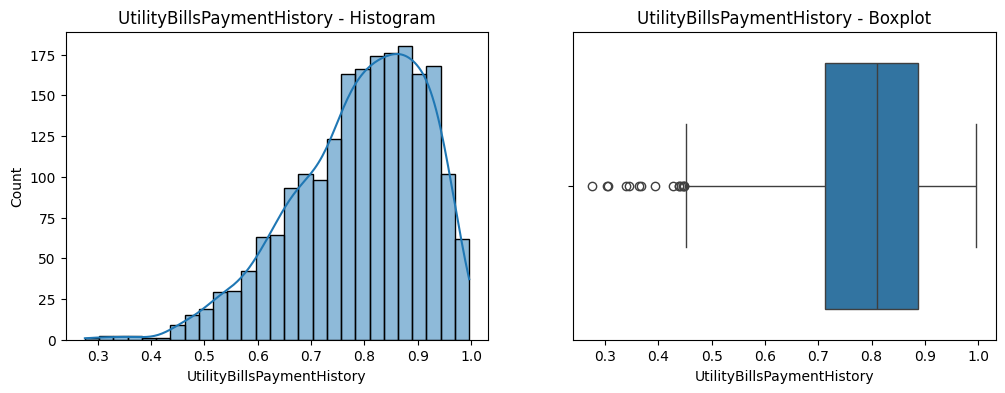


=== JobTenure Analysis (Numeric Discrete) ===
                                     Value
count                                 2050
mean                              5.072683
median                                 5.0
mode                                   5.0
std                               2.166357
min                                    0.0
25%                                    4.0
75%                                    6.0
max                                   12.0
skew                               0.45928
kurtosis                          0.093956
outlier_count                           80
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                              True


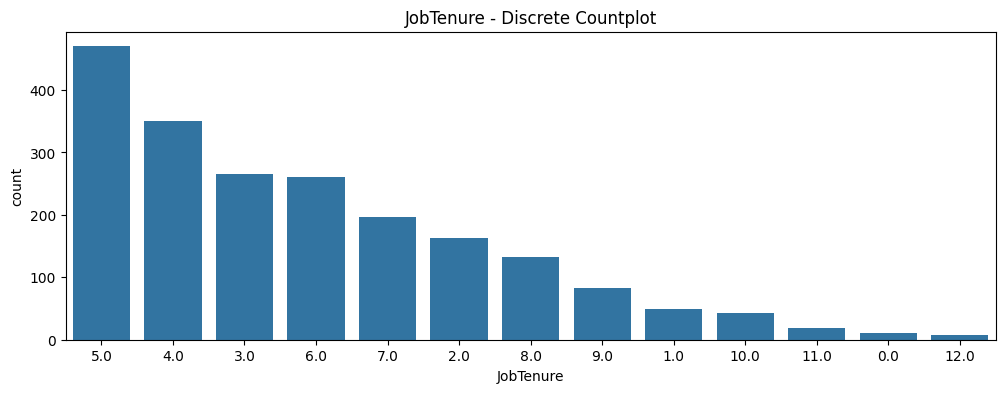


=== NetWorth Analysis (Numeric Continuous) ===
                           Value
count                       2050
mean                77373.412195
median                   35694.5
mode                        9651
std                134086.276937
min                         1018
25%                      9073.75
75%                     92026.75
max                      1645402
skew                    5.402081
kurtosis               43.258071
outlier_count                159
normality             Not Normal
distribution_type   Right-skewed
discrete                   False


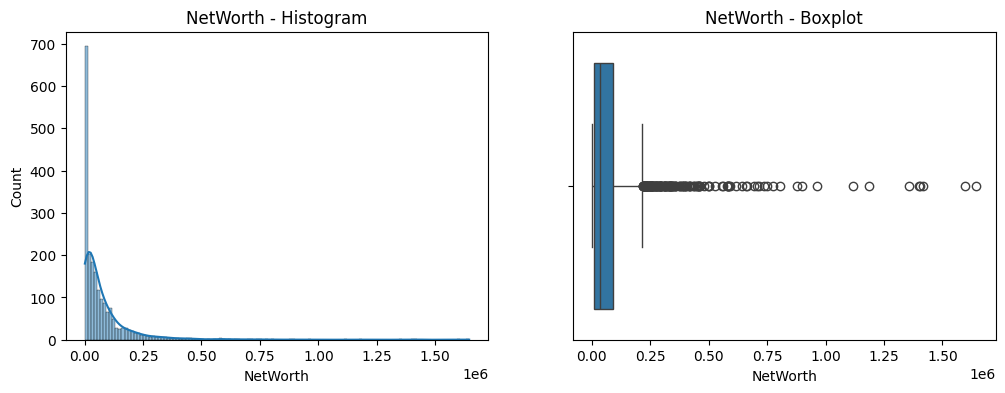


=== BaseInterestRate Analysis (Numeric Continuous) ===
                                     Value
count                                 2050
mean                              0.240882
median                             0.23811
mode                              0.191512
std                               0.035993
min                               0.130338
25%                               0.215449
75%                               0.264231
max                               0.384555
skew                              0.417245
kurtosis                          0.246546
outlier_count                           21
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                             False


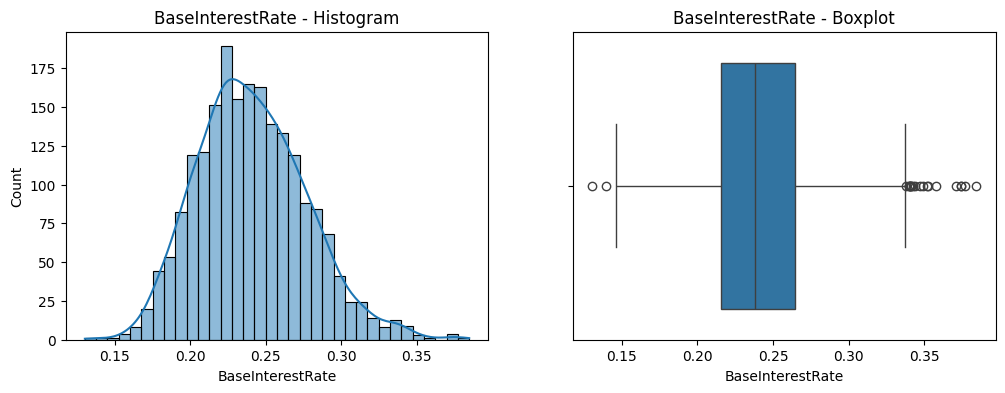


=== InterestRate Analysis (Numeric Continuous) ===
                                     Value
count                                 2050
mean                              0.240792
median                            0.237375
mode                               0.11331
std                               0.042887
min                                0.11331
25%                               0.210321
75%                               0.268571
max                               0.395984
skew                               0.32706
kurtosis                         -0.037797
outlier_count                           15
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                             False


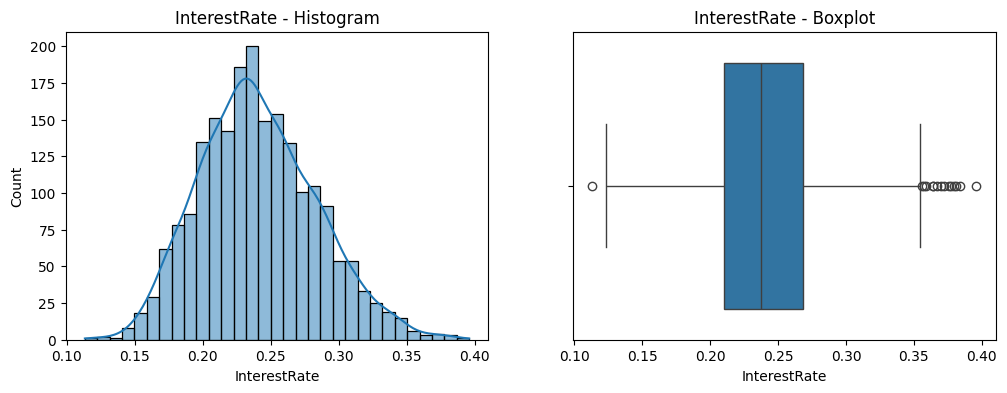


=== MonthlyLoanPayment Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean                 931.094014
median               735.522113
mode                 118.491581
std                  710.769016
min                  118.491581
25%                  511.277136
75%                 1118.015055
max                  7859.85508
skew                   3.178014
kurtosis              17.132457
outlier_count               133
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


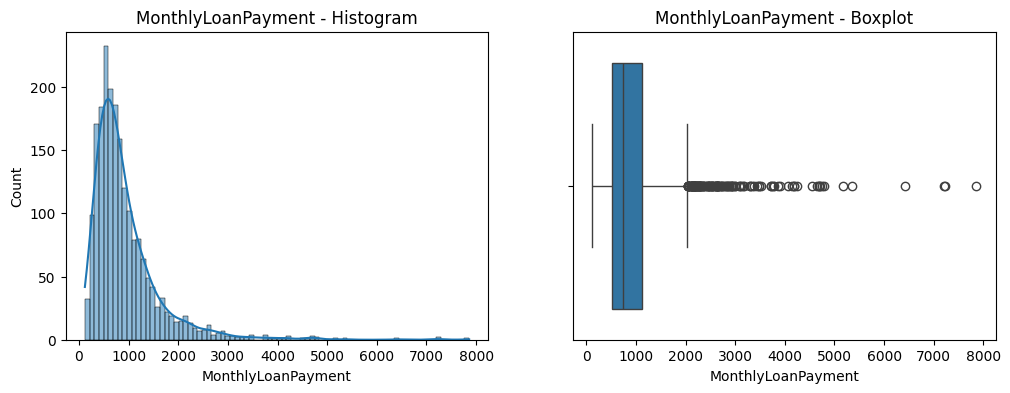


=== TotalDebtToIncomeRatio Analysis (Numeric Continuous) ===
                          Value
count                      2050
mean                   0.405455
median                 0.305972
mode                   0.034436
std                    0.334684
min                    0.034436
25%                    0.180706
75%                    0.518579
max                     4.14318
skew                   2.442251
kurtosis              11.893075
outlier_count               117
normality            Not Normal
distribution_type  Right-skewed
discrete                  False


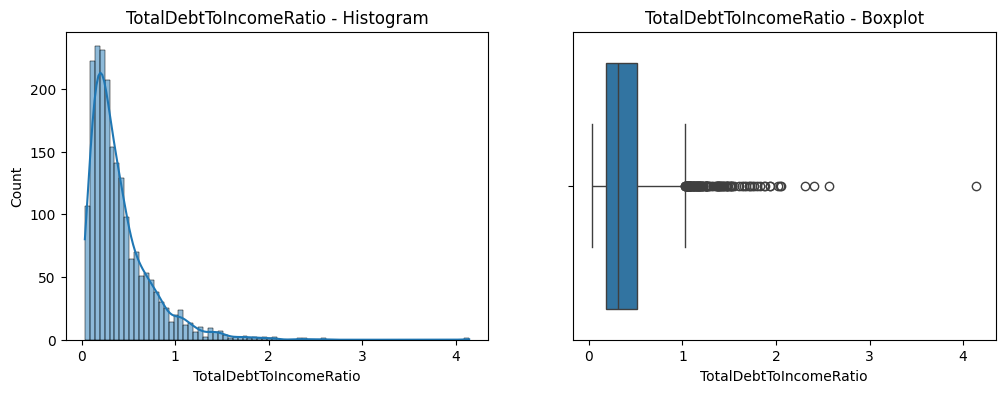


=== RiskScore Analysis (Numeric Continuous) ===
                                     Value
count                                 2050
mean                             50.774927
median                                51.0
mode                                  51.0
std                               7.745501
min                                   30.4
25%                                   46.0
75%                                   56.0
max                                   76.0
skew                             -0.110533
kurtosis                          -0.11825
outlier_count                           15
normality                       Not Normal
distribution_type  Approximately Symmetric
discrete                             False


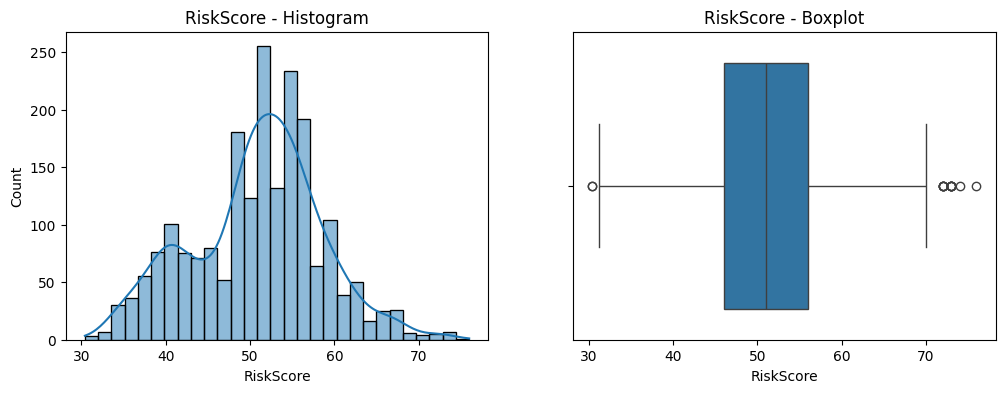


=== LoanApproved Analysis (Numeric Discrete) ===
                          Value
count                      2050
mean                   0.239024
median                      0.0
mode                          0
std                    0.426592
min                           0
25%                         0.0
75%                         0.0
max                           1
skew                   1.223837
kurtosis              -0.502224
outlier_count               490
normality            Not Normal
distribution_type  Right-skewed
discrete                   True


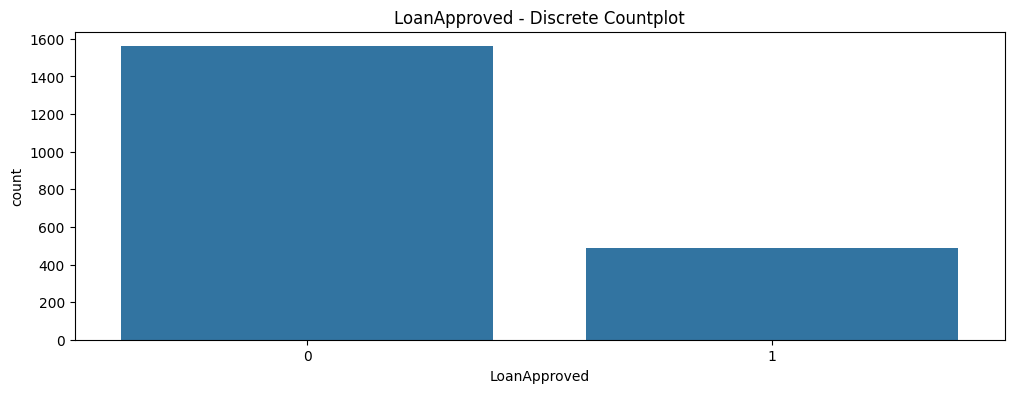

In [47]:
res_all = dataframe_godmode_advanced(df, exclude_columns=['ApplicationDate'])

In [ ]:
# قبول دارم کنده و شاید یکم کثیف نوشته شده اما کار میکنه